In [148]:
## Python for Earth Scientists: Lesson 5
# Run this cell in order to create the variables below. These variables will be used in the
# lesson. If for any reason you change one of these variables by mistake, you can re-run
# this cell in order to reset the variables. We will refer to this cell as the "first variables
# cell". This cell may look familiar from last lesson.

from IPython.display import HTML # Ignore this library
from IPython.display import display # Ignore this library

from tkinter import filedialog as fd # File dialog library. This can be used to select folders 
import numpy as np # Import numpy as np
import os # import operating systems interface
import matplotlib.pyplot as plt
from datetime import datetime as dt
import csv

In [149]:
# Review - Run this cell to create a user-defined function capable of handling "weather underground"
# meteorological data. What are the changes we made from "weather_UNDERGROUND_READER"?

def weather_UNDERGROUND_READER_upadated(file_NAME,**kwargs):
    """weather_UNDERGROUND_READER reads a meteorogical ascii file and outputs it as a dictionary.
    DELIMITER keyword argument must be set equal to a specific delimiter (comma, tab, etc.)"""
    seP = kwargs['DELIMITER'] # Call DELIMITER from kwargs. Set it equal to a variable
    with open(file_NAME) as FID: # Open file_NAME
#        FID.readline() # Skip over the FIRST line of file by not assigning it to a variable
        while 1:
            titlE = FID.readline() # Read each line of ascii file one at a time
            if 'Time,Temp' in titlE: # If "Time,Temp" is present ANYWHERE in the 
                break # Break for-loop
        titlE = titlE.strip().split(',') # Convert titlE from string to list
#        FID.readline() # Skip over the THIRD line of file by not assigning it to a variable
        METEOLOGICAL_DATA = {} # Create dictionary for meteorological data
        for t in titlE:
            # forloop builds METEOLOGICAL_DATA by setting keys equal to empty lists
            METEOLOGICAL_DATA[t] = [] # Create empty list for each title header
        for linE in FID:
            # For-loop goes through each ascii file line by line
            linE = linE.strip().split(',') # Convert linE from string to list
            for i,t in enumerate(titlE):
                # Nested for-loop grabs title headers, and uses them to index ascii values and
                # append them to the correct list (inside a key)
                METEOLOGICAL_DATA[t].append(linE[i]) # Append ascii value to a list. Use title header to find list
            FID.readline() # Skip over EVERY OTHER LINE in ascii file because they are blank
    return(METEOLOGICAL_DATA)

In [150]:
# 1. Today we are going to learn how to read multiple files into phython and combine the data 
# from them. Many times data are piece-meal, located in a series of files that must be read into
# your programing environment so that you can utilize them. F

In [151]:
# 1a. Run this cell. When prompted, select the folder "WU_2017". What type of variable is 
#"WU_LIST"? What does it contain? Replace "line2" annotation with a more descriptive comment

WU_path = fd.askdirectory() # Find the file pathway
WU_list = os.listdir(WU_path) #line2

In [152]:
# 1b. Run this cell twice. The first time, run the cell as is. Before running a second time
# comment, DO NOT DELETE line of code under "Section 1". Then uncomment the line of code 
# under section 2. 

# When it comes to lists, what is the difference between "append" and adding two lists together
# using simple addition?

monarch_NAME = ['Edward I','Henry VIII','Elizabeth I','George III','Victoria'] # craete list 1
monikER = ['Longshanks','Bad Husband','Oriana','the mad King','Widow of Winsor'] # create list 2

# Section 1
monarch_NAME.append(monikER)

# Section 2
# monarch_NAME = monarch_NAME + monikER

In [153]:
# 1c. You now have all of the tools needed to read multiple files into python using either 
# dictionaries or lists. Use these tools to create a program that is able to collect 
# Temperature, Time, and Pressure from all files the folder "WU_2017". Show your answer in this
# cell. Run cell 1d to hide the answer.

In [154]:
# 1d. Answer to 1c. Run this cell to hide the answer!

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To see the answer, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

###############################################################################################


#timE_LIST = [] # Empty list to store time
#temP_LIST = [] # Empty list to store temperature
#preS_LIST = [] # Empty list to store pressure
#for filE in WU_list:
#    # this for-loop goes through WU files, reads them into python, and then extracts temperature, 
#    # time, and pressure. It then places the arrays into the lists defined above.
#    if '.txt' in filE: # If the file is a weather underground ascii (.txt) file
#        filE_path = WU_path + '/' + filE # Construct file pathway
#        WU_DICT = weather_UNDERGROUND_READER_upadated(filE_path,DELIMITER=',') # Extract data from ascii file
#        timE_LIST = timE_LIST + WU_DICT['Time'] # Add times to list
#        temP_LIST = temP_LIST + WU_DICT['TemperatureF'] # Add temperatures to list
#        preS_LIST = preS_LIST + WU_DICT['PressureIn'] # Add pressures to list

In [155]:
# 2. Process and quality control data. 

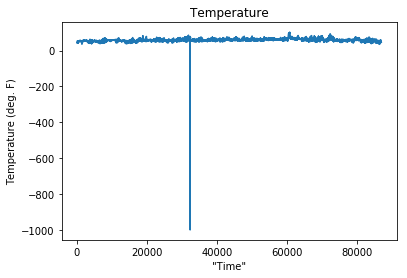

In [156]:
# 2a. Convert temperature into an numpy array and plot it
temP_array = np.asarray(temP_LIST,dtype=float) # Convert temperature in numpy array of floats
plt.plot(temP_array) # plot temperature
plt.title('Temperature') # title 
plt.xlabel('"Time"') # x-axis
plt.ylabel('Temperature (deg. F)') # y-axis
plt.show() # show temperature

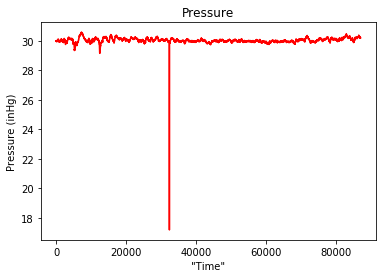

In [157]:
# 2b. Convert pressure into an numpy array and plot it
preS_array = np.asarray(preS_LIST,dtype=float) # Convert temperature in numpy array of floats
plt.plot(preS_array,'r') # plot temperature
plt.title('Pressure') # title
plt.xlabel('"Time"') # x-axis
plt.ylabel('Pressure (inHg)') # y-axis
plt.show() # show temperature

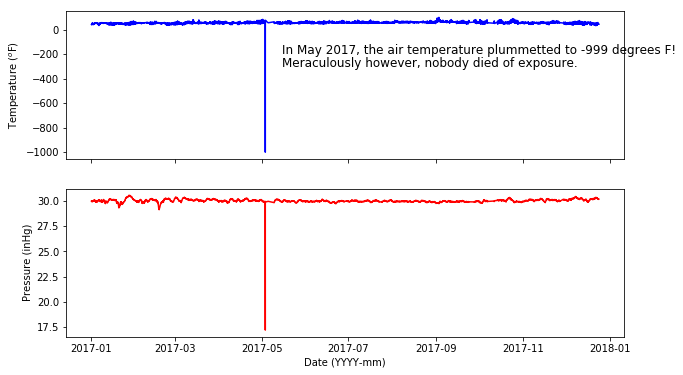

In [158]:
# 2c Convert lists of timestamp strings to python datetime
forMAT = "%Y-%m-%d %H:%M:%S" # datetime format for timestamp: "YYYY-mm-dd HH:MM:SS" 
                             # (e.g. 2000-03-17 15:43:15)
timE_array = [dt.strptime(t, forMAT) for t in timE_LIST] # Convert list of strings into list of datetimes

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, sharey=False)
ax = axs[0]
ax.plot(timE_array,temP_array,'b') # plot temperature
ax.set_ylabel('Temperature ($^o$F)') # y-axis
ax.text(dt.strptime('2017-05-15','%Y-%m-%d'),-200,'In May 2017, the air temperature plummetted to -999 degrees F!',fontsize=12)
ax.text(dt.strptime('2017-05-15','%Y-%m-%d'),-300,'Meraculously however, nobody died of exposure.',fontsize=12)

ax = axs[1]
ax.plot(timE_array,preS_array,'r') # plot temperature
ax.set_ylabel('Pressure (inHg)') # y-axis
ax.set_xlabel('Date (YYYY-mm)')
plt.show()

More information on formatting date strings can be found at:
https://www.tutorialspoint.com/python/time_strptime.htm

In [159]:
#3. By plotting our data, we should be able to easily spot errors. In this case, it is clear 
# that -999 degrees F is used to mark missing data. In addition to missing data, instruments 
# are vulnerable to measurement errors. For example, does an atmospheric pressure of 
# < 17.5 inHg seem realistic?

# Performing quality assurance and quality control (QAQC) on our data is extremely important in any 
# scientific discipline, especially earth science. Analyzing data with erroneous values can be
# catastrophic in science. Erroneous data must be:
# 
# a. Identified - devise a system for flagging problematic values
# b. Indexed - determine location of problematic values in arrays or matrices
# c. Removed - remove problematic values

In [160]:
# 3a. Determine and index realistic miminum and maximum temperatures pressures for the central 
# California coast. Use this cell.



In [161]:
# Answer to 3a. Run cell to hide answer!

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To see the answer, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

###############################################################################################
preS_array2 = preS_array # Create new preS_array to keep SARPIANS hones!
temP_array2 = temP_array # Create new temP_array2 to keep SARPIANS hones!


### 1. Define temperature range
miN_TEMP = 0 # minimum realistic temperature
maX_TEMP = 120 # maximum realistic temperature


### 2. Index find and index problematic values. Use Method 1 OR Method 2. NO NEED TO USE BOTH!
# Method 1: Indexing problematic values based on previous lessons
temP_IND = [] # empty list for indices of problematic temperatures
for i,t in enumerate(temP_array2):
    # for-loop cycles through all 80,000 + temperatures 
    # measured in 2017. It will determine which temperatures are problematic
    # and which ones are not.
    if t <= miN_TEMP or t > maX_TEMP:
        temP_IND.append(i)
        
# Method 2: Indexing problematic values using numpy (alternative to Method 1)
temP_IND = np.where((temP_array2 < miN_TEMP) | (temP_array2 >= maX_TEMP)) 
# When using np.where, and = & and or = |.

# Find and index problematic values (Method 2)
# Define pressure range
miN_PRES = 20 # minimum realistic pressure
maX_PRES = 35 # maximum realistic pressure
# Index problematic pressures
preS_IND = np.where((preS_array2 < miN_PRES) | (preS_array2 >= maX_PRES)) # index problematic pressures


In [ ]:
# 3b. Remove problematic temperature and pressure values and re-plot data.

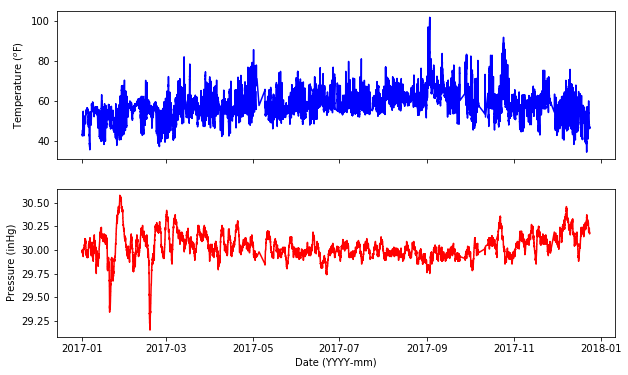

In [162]:
# Answer to 3b. Run cell to hide answer!

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To see the answer, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

###############################################################################################

temP_array2[temP_IND] = np.nan # Replace problematic temperature values with nan
preS_array2[preS_IND] = np.nan # Replace problematic pressure values with nan
# Create two conjoined subplots
# Determine number of plots, size of plots, and whether axes must be the same
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, sharey=False) 
ax = axs[0] # First subplot
ax.plot(timE_array,temP_array2,'b') # plot temperature
ax.set_ylabel('Temperature ($^o$F)') # y-axis
#ax.text(dt.strptime('2017-05-15','%Y-%m-%d'),-200,'In May 2017, the air temperature plummetted to -999 degrees F!',fontsize=12)
#ax.text(dt.strptime('2017-05-15','%Y-%m-%d'),-300,'Meraculously however, nobody died of exposure.',fontsize=12)

ax = axs[1] # Second subplot
ax.plot(timE_array,preS_array2,'r') # plot temperature
ax.set_ylabel('Pressure (inHg)') # y-axis
ax.set_xlabel('Date (YYYY-mm)') # x-axis
plt.show() # display subplot

In [163]:
# Suggested Steps:
# *
# *Index values that fall realistic ranges
# *Remove these problematic values from your dataset
# *Replot data 

# Hint: for-loops, conditional statements (e.g. if, elif, & else), and "append" are your 
# friends!

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To see the answer, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

###############################################################################################
#### QAQC Temperature

preS_array2 = preS_array # Create new preS_array to keep SARPIANS hones!
temP_array2 = temP_array # Create new temP_array2 to keep SARPIANS hones!


### 1. Define important variables
miN_TEMP = 0 # minimum realistic temperature
maX_TEMP = 120 # maximum realistic temperature
temP_IND = [] # empty list for indices of problematic temperatures


### 2. Index find and index problematic values. Use Method 1 OR Method 2. NO NEED TO USE BOTH!
# Method 1: Indexing problematic values based on previous lessons
for i,t in enumerate(temP_array2):
    # for-loop cycles through all 80,000 + temperatures 
    # measured in 2017. It will determine which temperatures are problematic
    # and which ones are not.
    if t <= miN_TEMP or t > maX_TEMP:
        temP_IND.append(i)
        
# Method 2: Indexing problematic values using numpy (alternative to Method 1)
temP_IND = np.where((temP_array2 < miN_TEMP) | (temP_array2 >= maX_TEMP)) 
# When using np.where, and = & and or = |.

### 3. Replace problematic values with "nan" values. 
# Extra Credit Questions:
    # Why is it a bad idea to cut these out of the array all together? 
    # Why is it a bad idea to replace problematic values with zero?
    # Why should you not replace problematic values with a custom made string?
temP_array2[temP_IND] = np.nan # Replace problematic temperature values with nan

#### QAQC Pressure (steps 1-3 truncated from above)
#Define important variables
miN_PRES = 20 # minimum realistic pressure
maX_PRES = 35 # maximum realistic pressure
# Index problematic values
preS_IND = np.where((preS_array2 < miN_PRES) | (preS_array2 >= maX_PRES)) # index problematic pressures
preS_array2[preS_IND] = np.nan # Replace problematic pressure values with nan

# Create two conjoined subplots
# Determine number of plots, size of plots, and whether axes must be the same
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, sharey=False) 
ax = axs[0] # First subplot
ax.plot(timE_array,temP_array2,'b') # plot temperature
ax.set_ylabel('Temperature ($^o$F)') # y-axis
#ax.text(dt.strptime('2017-05-15','%Y-%m-%d'),-200,'In May 2017, the air temperature plummetted to -999 degrees F!',fontsize=12)
#ax.text(dt.strptime('2017-05-15','%Y-%m-%d'),-300,'Meraculously however, nobody died of exposure.',fontsize=12)

ax = axs[1] # Second subplot
ax.plot(timE_array,preS_array2,'r') # plot temperature
ax.set_ylabel('Pressure (inHg)') # y-axis
ax.set_xlabel('Date (YYYY-mm)') # x-axis
plt.show() # display subplot

In [ ]:
# 4. Create new csv file that contains QAQC data!


In [168]:
# 4a. Construct dictionary with QAQC'd data

COMBINED_DATA = {} # Create new dictionary
COMBINED_DATA['Time'] = timE_LIST # Add original date/time list to dictionary 
COMBINED_DATA['Temperature'] = temP_array2 # Add temperature array to dictionary
COMBINED_DATA['Pressure'] = preS_array2 # Add pressure array to dictionary


In [169]:
# 4b. Create user-defined function

def Dict2CSV(file_name,GENERIC_DICT,**kwargs):
    """This function will take a dictionary (GENERIC_DICT) and write it into a csv file called (file_name).
    "GENERIC_DICT" is any dictionary comprised of equally sized lists. file_name should contain not only the 
    desired file name, but also the pathway for accessing it. Set DELIMITER equal to desired delimiter (e.g. ',','\t, etc.)"""
    seP = kwargs['DELIMITER'] # Keyword argument. Set this equal to the desired delimiter
    with open(file_name,'w') as FID: # Creates a brand new csv file and file identifier
        CSV_WRITE = csv.writer(FID, delimiter=seP,quotechar='|') # Creates writer object
        CSV_WRITE.writerow(GENERIC_DICT.keys()) # writes GENERIC_DICT keys as the first line of "data"
        # Now we need to count the elements in each of our lists. They should be the same for all keys
        # so we only need to do this once.
        keY_LIST = list(GENERIC_DICT.keys()) # Make a list containing all GENERIC_DICT keys
        # We don't know how many keys will be in this list because it may be different for 
        # each dictionary. But we know that all dictionaries contain AT LEAST one key!
        first_KEY = keY_LIST[0] # Find the name of GENERIC_DICT's first key
        first_LST = GENERIC_DICT[first_KEY] # Find the length of list inside GENERIC_DICT's first key
        numELEMENT = len(first_LST) # Find the number of elements inside GENERIC_DICT's first key
        for i in range(numELEMENT): 
            # Using the function "range", this for-loop cycles through an array of integers. These
            # integers increase in value from 0 to numELEMENT-1 and correspond to the indices of
            # lists contained in GENERIC_DICT keys
            roW = [] # Create an empty list called "roW"
            for p in GENERIC_DICT.keys():
                # This is a nested for-loop that runs inside of the big for loop by cycling through
                # generic dictionary keys. 
                eLMT = GENERIC_DICT[p][i] # Variable for each dictionary key element. 
                roW.append(eLMT) # Add eLMT to roW (initially empty)
            CSV_WRITE.writerow(roW) # writes roW into the csv file

In [170]:
# 4c. Save newly created dictionary as .csv file. Select a folder in which to place it.

csv_pathWAY = fd.askdirectory() + '/' # Select file pathway (folder) with dialog box
csv_fileNAME = 'WHARFDATA_2017.csv' # File name for csv file
Dict2CSV(csv_pathWAY+csv_fileNAME,COMBINED_DATA,DELIMITER=',') # Save dictionary data to csv file

In [165]:
temP_IND

(array([32396]),)